In [10]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [11]:
class AgentState(TypedDict):
    num1:int
    operation:str
    num2:int
    num3:int
    num4:int
    finalNumber:int
    finalNumber2:int

In [12]:
def adder(state: AgentState) -> AgentState:
    """this nodes adds two numbers"""
    state['finalNumber'] = state['num1'] + state['num2']
    return state


def subtractor(state: AgentState) -> AgentState:
    """this nodes subtracts two numbers"""
    state['finalNumber'] = state['num1'] - state['num2']
    return state


def decide_next_node(state: AgentState) -> AgentState:
    """this node decides which node to go to next"""
    if state['operation'] == '+':
        return "addition_operation"

    elif state['operation'] == '-':
        return "subtraction_operation"

In [28]:
graph = StateGraph(AgentState)



graph.add_node("add_node", adder)
graph.add_node("sub_node", subtractor)
graph.add_node("router", lambda state: state)
graph.add_node("router2", lambda state: state)
graph.add_node("add_node2", adder)
graph.add_node("sub_node2", subtractor)


graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "sub_node",
    }
)



graph.add_edge("add_node", 'router2')
graph.add_edge("sub_node", 'router2')

graph.add_conditional_edges(
    "router2",
    decide_next_node,
    {
        "addition_operation": "add_node2",
        "subtraction_operation": "sub_node2",
    }
)

app = graph.compile()

In [ ]:
graph.add_node("router2", lambda state: state)
graph.add_edge("add_node", "router2")
graph.add_edge("sub_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "sub_node",
    }
)

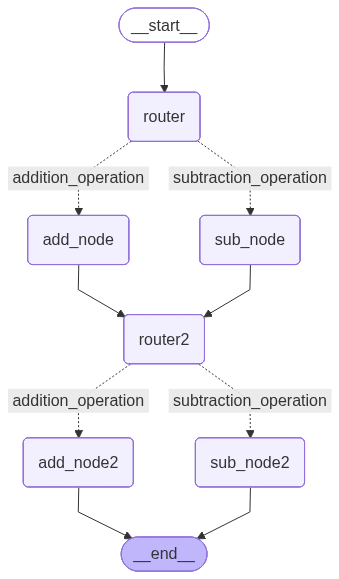

In [29]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
initial_state = {"num1": 10, "num2": 5, "operation": "+", "num3": 20, "num4": 50, "operation2": "+"}
result = app.invoke(initial_state)
print(result['finalNumber'])

15
